# Classification (K-Nearest-Neighbors)

## Iris Classifier
For this in-class exercise we will look at the Iris dataset and use scikit learn to classify the different types of Irises.
- Done in Class (Data 201)

## Individual Exercises
Selected 3 different datasets and use the kNN classifier to build a model for them.
- https://archive.ics.uci.edu/ml/datasets.php



### Imports and style

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
height = 5
plt.rcParams["figure.figsize"] = [1.618*height, height]
plt.style.use("seaborn")

### Iris Dataset
#### Load the Iris data into a DataFrame

In [45]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' 

cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "type"]
iris_data = pd.read_csv("../data/iris.data", header=None, names=cols)
iris_data

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Separate Data into DataFrames for each class (type)


In [46]:
df_setosa = iris_data[iris_data.type == "Iris-setosa"].drop("type", axis=1)
df_versicolor = iris_data[iris_data.type == "Iris-versicolor"].drop("type", axis=1)
df_virginica = iris_data[iris_data.type == "Iris-virginica"].drop("type", axis=1)


#### Explore Data

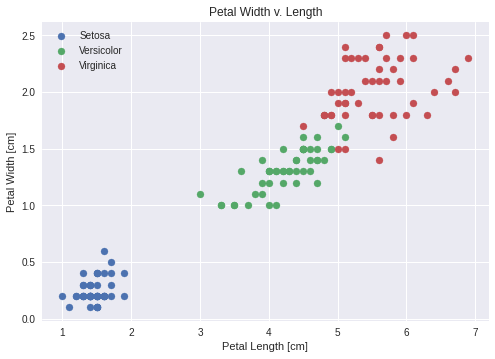

In [47]:
plt.scatter(df_setosa.petal_length, df_setosa.petal_width, label="Setosa")
plt.scatter(df_versicolor.petal_length, df_versicolor.petal_width, label="Versicolor")
plt.scatter(df_virginica.petal_length, df_virginica.petal_width, label="Virginica")
plt.legend()
plt.ylabel("Petal Width [cm]")
plt.xlabel("Petal Length [cm]")
plt.title("Petal Width v. Length")
plt.show()

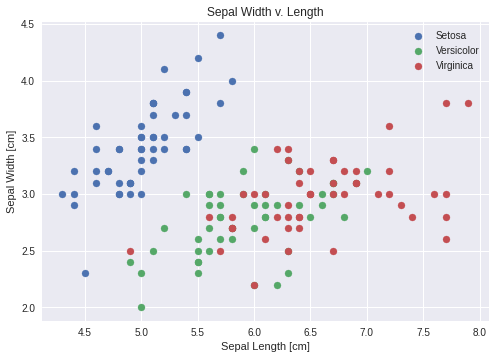

In [48]:
plt.scatter(df_setosa.sepal_length, df_setosa.sepal_width, label="Setosa")
plt.scatter(df_versicolor.sepal_length, df_versicolor.sepal_width, label="Versicolor")
plt.scatter(df_virginica.sepal_length, df_virginica.sepal_width, label="Virginica")
plt.legend()
plt.ylabel("Sepal Width [cm]")
plt.xlabel("Sepal Length [cm]")
plt.title("Sepal Width v. Length")
plt.show()

#### Create a numerical column for species

In [49]:
species = {"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}
iris_data["species"] = [species[i] for i in iris_data["type"]]
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,type,species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


#### Get Data and Labels

In [50]:
data = iris_data.drop(["type", "species"], axis=1)
labels = iris_data["species"]

#### Split Training and Test Data

In [51]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, labels, random_state=0)

percent_training = len(data_train) / len(data)
print(f"amt of training data: {len(data_train)}\t{percent_training:.2%}")
print(f"amt of testing  data: {len(data_test)}\t{1-percent_training:.2%}")

amt of training data: 112	74.67%
amt of testing  data: 38	25.33%


#### Classify and Score Model

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

_ = knn.fit(data_train, label_train)

In [53]:
score = knn.score(data_test, label_test)
print(f"Score:   {score:.4%}")

Score:   97.3684%


---
### Dataset: Classifying Mushrooms

Website: https://archive-beta.ics.uci.edu/ml/datasets/mushroom

- No problems, except that the data is all nominal. So I converted it to numerical data before using KNN.


Abstract:

*From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible*


**Characteristics (23)**

| Feature                  | values                                                       |
| ------------------------ | ------------------------------------------------------------ |
| edibility                | edible=e,poisonous=p                                         |
| cap-shape                | bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s         |
| cap-surface              | fibrous=f,grooves=g,scaly=y,smooth=s                         |
| cap-color                | brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y |
| bruising                 | true=t,false=f                                               |
| odor                     | almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s |
| gill-attachment          | attached=a,descending=d,free=f,notched=n                     |
| gill-spacing             | close=c,crowded=w,distant=d                                  |
| gill-size                | broad=b,narrow=n                                             |
| gill-color               | black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y |
| stalk-shape              | enlarging=e,tapering=t                                       |
| stalk-root               | bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? |
| stalk-surface-above-ring | fibrous=f,scaly=y,silky=k,smooth=s                           |
| stalk-surface-below-ring | fibrous=f,scaly=y,silky=k,smooth=s                           |
| stalk-color-above-ring   | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y |
| stalk-color-below-ring   | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y |
| veil-type                | partial=p,universal=u                                        |
| veil-color               | brown=n,orange=o,white=w,yellow=y                            |
| ring-number              | none=n,one=o,two=t                                           |
| ring-type                | cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z |
| spore-print-color        | black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y |
| population               | abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y |
| habitat                  | grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d |


#### Read in Data

In [54]:
cols = ["edibility","cap-shape","cap-surface","cap-color","bruising",
        "odor","gill-attachment","gill-spacing","gill-size","gill-color",
        "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
        "stalk-color-above-ring", "stalk-color-below-ring", "veil-type","veil-color","ring-number",
        "ring-type","spore-print-color","population","habitat"]

df_mushrooms = pd.read_csv("../data/Mushroom/agaricus-lepiota.csv", header=None, names=cols)

#### Convert to numerical for KNN algorithm

In [55]:
df_mushrooms_numerical = df_mushrooms.applymap(ord)

#### Split Training and Test Data

In [56]:
labels = df_mushrooms_numerical["edibility"]
data   = df_mushrooms_numerical.drop("edibility", axis=1)

from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, labels, random_state=0,test_size=.9)

percent_training = len(data_train) / len(data)
print(f"amt of training data: {len(data_train)}\t{percent_training:.2%}")
print(f"amt of testing  data: {len(data_test)}\t{1-percent_training:.2%}")


amt of training data: 812	10.00%
amt of testing  data: 7312	90.00%


#### Classify and Score Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

_ = knn.fit(data_train, label_train)

In [58]:
score = knn.score(data_test, label_test)
print(f"Score:   {score:.4%}")

Score:   99.0837%


#### Removing some features...

In [59]:
# Reduce columns to ones that can be visually seen.
reduced_cols = ["edibility",
                "cap-shape","cap-color",
                "gill-size","gill-color",
                "stalk-shape",
                "ring-number",
                "ring-type",
                "stalk-color-above-ring",
                "stalk-color-below-ring",
                "population"]
reduced_mushrooms_numerical = df_mushrooms_numerical[reduced_cols]


#### Split Training and Test Data

In [60]:
labels = reduced_mushrooms_numerical["edibility"]
data   = reduced_mushrooms_numerical.drop("edibility", axis=1)

from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, labels, random_state=0)

percent_training = len(data_train) / len(data)
print(f"amt of training data: {len(data_train)}\t{percent_training:.2%}")
print(f"amt of testing  data: {len(data_test)}\t{1-percent_training:.2%}")

amt of training data: 6093	75.00%
amt of testing  data: 2031	25.00%


#### Classify and Score Model

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

_ = knn.fit(data_train, label_train)

In [62]:
score = knn.score(data_test, label_test)
print(f"Score:   {score:.4%}")

Score:   98.9660%


----
### Dataset: Car Evaluation

Website: https://archive-beta.ics.uci.edu/ml/datasets/car+evaluation

- Why: Seemed interesting and also this is ordinal data (unlike the mushrooms)

Abstract:

Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.

| Features |Values|
|----------|---|
| buying   |  v-high, high, med, low|
| maint    |  v-high, high, med, low|
| doors    |  2, 3, 4, 5-more|
| persons  |  2, 4, more|
| lug_boot |  small, med, big|
| safety   |   low, med, high|

#### Read in Data

In [63]:
cols = ["buying", "maintenance", "doors", "persons", "lug_boot", "safety", "quality"]
df_car_eval = pd.read_csv("../data/car/car.data", header=None, names=cols)
df_car_eval.head()

,buying,maintenance,doors,persons,lug_boot,safety,quality
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### Convert to Numeric type for KNN

In [64]:
def car_num(value):
    if str(value).isdigit():
        return value
    new_value = {"vhigh":5,"high":4,"med":3,"low":2,
            "5more":5,"more":5,
            "small":2,"big":4,
            "unacc":0, "acc":1, "good":2,"vgood":3}
    return new_value.get(value)

df_car_eval_numeric = df_car_eval.applymap(car_num)
df_car_eval_numeric.head()

,buying,maintenance,doors,persons,lug_boot,safety,quality
0,5,5,2,2,2,2,0
1,5,5,2,2,2,3,0
2,5,5,2,2,2,4,0
3,5,5,2,2,3,2,0
4,5,5,2,2,3,3,0


#### Split Data & Labels into Training and Testing sets


In [65]:
data = df_car_eval_numeric.drop("quality", axis=1)
labels = df_car_eval_numeric["quality"]
data_train, data_test, label_train, label_test = train_test_split(data, labels, random_state=0)

percent_training = len(data_train) / len(data)
print(f"amt of training data: {len(data_train)}\t{percent_training:.2%}")
print(f"amt of testing  data: {len(data_test)}\t{1-percent_training:.2%}")

amt of training data: 1296	75.00%
amt of testing  data: 432	25.00%


#### Apply KNN and Score

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)

_ = knn.fit(data_train, label_train)

In [67]:
score = knn.score(data_test, label_test)
print(f"Score:   {score:.4%}")

Score:   94.9074%


### Dataset: MPG

- Why: This

Abstract
Revised from CMU StatLib library, data concerns city-cycle fuel consumption

Website: https://archive-beta.ics.uci.edu/ml/datasets/auto+mpg



Attribute Information:
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)


Missing Data is represented with: `1`

#### Read in Data

In [68]:
cols = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
df_car_mpg = pd.read_csv("../data/mpg/auto-mpg.data", header=None, names=cols, delimiter=" ", skipinitialspace=True)
df_car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
18.0,8,307.0,130.0,3504.0,12.0,70,"1\t""chevrolet",chevelle,"malibu"""
15.0,8,350.0,165.0,3693.0,11.5,70,"1\t""buick",skylark,"320"""
18.0,8,318.0,150.0,3436.0,11.0,70,"1\t""plymouth","satellite""",NaN
16.0,8,304.0,150.0,3433.0,12.0,70,"1\t""amc",rebel,"sst"""
17.0,8,302.0,140.0,3449.0,10.5,70,"1\t""ford","torino""",NaN


#### Convert to Numeric type for KNN

In [69]:
def car_num(value):
    if str(value).isdigit():
        return value
    new_value = {"vhigh":5,"high":4,"med":3,"low":2,
            "5more":5,"more":5,
            "small":2,"big":4,
            "unacc":0, "acc":1, "good":2,"vgood":3}
    return new_value.get(value)

df_car_eval_numeric = df_car_eval.applymap(car_num)
df_car_eval_numeric.head()

,buying,maintenance,doors,persons,lug_boot,safety,quality
0,5,5,2,2,2,2,0
1,5,5,2,2,2,3,0
2,5,5,2,2,2,4,0
3,5,5,2,2,3,2,0
4,5,5,2,2,3,3,0


#### Split Data & Labels into Training and Testing sets

In [70]:
data = df_car_eval_numeric.drop("quality", axis=1)
labels = df_car_eval_numeric["quality"]
data_train, data_test, label_train, label_test = train_test_split(data, labels, random_state=0)

percent_training = len(data_train) / len(data)
print(f"amt of training data: {len(data_train)}\t{percent_training:.2%}")
print(f"amt of testing  data: {len(data_test)}\t{1-percent_training:.2%}")

amt of training data: 1296	75.00%
amt of testing  data: 432	25.00%


#### Apply KNN and Score

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)

_ = knn.fit(data_train, label_train)

In [72]:
score = knn.score(data_test, label_test)
print(f"Score:   {score:.4%}")

Score:   94.9074%


### Dataset: Miles per Gallon

- Why: This has a mixture of continuous and discrete data
- The issue I had is shown below
    - mpg has too many classes, so I had to reduce them.

Website: https://archive-beta.ics.uci.edu/ml/datasets/auto+mpg

Abstract: Revised from CMU StatLib library, data concerns city-cycle fuel consumption

Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

Missing Attribute Values:  horsepower has 6 missing values marked with "`?`"


#### Convert to CSV and Read File

- the original file didn't load into pandas well

In [73]:
file_bad = "../data/mpg/auto-mpg.data"
file_csv = "../data/mpg/auto-mpg.csv"

In [74]:
import re

with open(file_bad, 'r') as File : file_data = File.read()


# file_data = re.sub('"+', '', file_data)
file_data = re.sub(' +', ',', file_data)
file_data = re.sub('\t+', ',', file_data)

with open(file_csv, 'w') as file: file.write(file_data)

In [75]:
cols = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year","origin","car_name"]
df_mpg = pd.read_csv(file_csv, delimiter=",", header=None, names=cols)
df_mpg = df_mpg.drop("origin", axis=1).drop("car_name", axis=1)
df_mpg = df_mpg[df_mpg["horsepower"] != "?"] # Drop 6 rows with missing field

In [76]:
df_mpg = df_mpg.applymap(pd.to_numeric)
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


#### Split Data & Labels into Training and Testing sets

In [77]:
data = df_mpg.drop("mpg", axis=1)
labels = df_mpg["mpg"].apply(round)

data_train, data_test, label_train, label_test = train_test_split(data, labels, random_state=0)

percent_training = len(data_train) / len(data)
print(f"amt of training data: {len(data_train)}\t{percent_training:.2%}")
print(f"amt of testing  data: {len(data_test)}\t{1-percent_training:.2%}")

amt of training data: 294	75.00%
amt of testing  data: 98	25.00%


#### Apply KNN and Score

In [78]:
knn = KNeighborsClassifier(n_neighbors=5)

_ = knn.fit(data_train, label_train)

In [79]:
score = knn.score(data_test, label_test)
print(f"Score:   {score:.4%}")


Score:   11.2245%


Well that is not good...
- Obviously, because there are too many classes (mpg)
- Solution - Re-classify into (low, medium, high) mpg categories.

#### Reclassification

- decided to base new classification on inter-quartile range

In [80]:
mpg = np.sort(np.array(df_mpg["mpg"]))
y = np.arange(0, mpg.size)

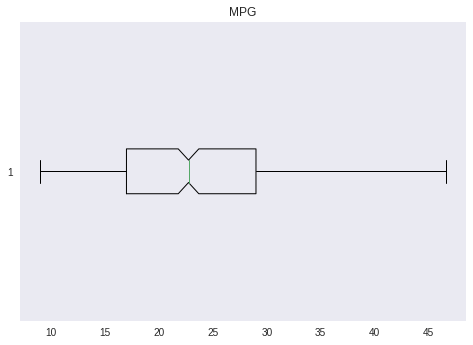

In [81]:
# Create New Classes
q1, q3 = np.percentile(mpg, [25,75])
mean = np.mean(mpg)
std = np.mean(mpg)

plt.title("MPG")
plt.grid(False)
plt.boxplot(mpg, vert=False, notch=True)
plt.show()

In [82]:
def map_to_string(mpg):
    if q1 < mpg:
        return "low"
    if q1 <= mpg <= q3:
        return "average"
    if mpg < q3:
        return "high"

In [83]:
# Re-class mpg column
Type = [map_to_string(mpg) for mpg in df_mpg["mpg"]]
df_mpg = df_mpg.drop("mpg", axis=1)
df_mpg["mpg"] = Type
df_mpg = df_mpg.drop("model_year", axis=1)
df_mpg

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8,307.0,130.0,3504.0,12.0,low
1,8,350.0,165.0,3693.0,11.5,high
2,8,318.0,150.0,3436.0,11.0,low
3,8,304.0,150.0,3433.0,12.0,high
4,8,302.0,140.0,3449.0,10.5,average
...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,low
394,4,97.0,52.0,2130.0,24.6,low
395,4,135.0,84.0,2295.0,11.6,low
396,4,120.0,79.0,2625.0,18.6,low


Done creating new classes.  Now let's try this again.

#### Split Data & Labels into Training and Testing sets

In [84]:
data = df_mpg.drop("mpg", axis=1)
labels = df_mpg["mpg"]

data_train, data_test, label_train, label_test = train_test_split(data, labels, random_state=0)

percent_training = len(data_train) / len(data)
print(f"amt of training data: {len(data_train)}\t{percent_training:.2%}")
print(f"amt of testing  data: {len(data_test)}\t{1-percent_training:.2%}")

amt of training data: 294	75.00%
amt of testing  data: 98	25.00%


#### Apply KNN and Score

In [85]:
knn = KNeighborsClassifier(n_neighbors=7)

_ = knn.fit(data_train, label_train)

In [86]:
score = knn.score(data_test, label_test)
print(f"Score:   {score:.4%}")



Score:   94.8980%
